# 1) Explanatory data analysis

## Importing, cleaning and transforming the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Resistance data

In [2]:
resistance_data = pd.read_csv('antibio_dataset/resist.csv')

In [3]:
resistance_data.shape

(3786, 4)

In [4]:
resistance_data

,Sample_ID,azm_sr,cip_sr,cfx_sr
0,ERR1549286,1.0,NaN,NaN
1,ERR1549290,1.0,NaN,NaN
2,ERR1549291,1.0,NaN,NaN
3,ERR1549287,1.0,NaN,NaN
4,ERR1549288,1.0,NaN,NaN
...,...,...,...,...
3781,ERR2172350,1.0,NaN,NaN
3782,ERR2172351,1.0,NaN,NaN
3783,ERR2172352,1.0,NaN,NaN
3784,ERR2172353,1.0,NaN,NaN


In [5]:
resistance_data.dtypes

Sample_ID     object
azm_sr       float64
cip_sr       float64
cfx_sr       float64
dtype: object

Missing values per column:

In [6]:
resistance_data.isna().sum()

Sample_ID      0
azm_sr       308
cip_sr       698
cfx_sr       385
dtype: int64

Proportion of missing values per column:

In [7]:
resistance_data.isna().sum() / len(resistance_data)

Sample_ID    0.000000
azm_sr       0.081352
cip_sr       0.184363
cfx_sr       0.101690
dtype: float64

Although the share of missing values per column is not significantly high, one would still aim to keep as much data points as possible for the prediction analysis. Thus imputation of missing values would be a possible step but in this case the authors hold no information about the biological similarity of the samples. Not being certain if Sample_ID string similarity would also translate into biological dimilarity between the samples, authors decided not to impute the missing values without additional similarity measures and omit the samples that have missing values from the analysis entirely.

In [8]:
azithromycin_res = resistance_data[resistance_data['azm_sr'].isna() != True][['Sample_ID','azm_sr']]
cefixime_res = resistance_data[resistance_data['cfx_sr'].isna() != True][['Sample_ID','cfx_sr']]
ciprofloxacin_res = resistance_data[resistance_data['cip_sr'].isna() != True][['Sample_ID','cip_sr']]

In [9]:
print(f"Azithromycin: {azithromycin_res.shape[0]} samples")
print(f"Cefixime: {cefixime_res.shape[0]} samples")
print(f"Ciprofloxacin: {ciprofloxacin_res.shape[0]} samples")

Azithromycin: 3478 samples
Cefixime: 3401 samples
Ciprofloxacin: 3088 samples


### K-mer data

In [10]:
kmers_azithromycin = pd.read_csv('antibio_dataset/kmers_azithromycin.tsv', sep="\t")
kmers_cefixime = pd.read_csv('antibio_dataset/kmers_cefixime.tsv', sep="\t")
kmers_ciprofloxacin = pd.read_csv('antibio_dataset/kmers_ciprofloxacin.tsv', sep="\t")

In [11]:
kmers_azithromycin.head()

,pattern_id,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
0,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,TACCGTAACCGGCAATGCGGATATTACGGTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In order to merge the information of the resistance data tables and k-mer data tables, the k-mer tables need to be transposed (sample IDs in rows and patterns in columns).

In [12]:
# Azithromycin

kmers_azithromycin = kmers_azithromycin.transpose()

# Making the first row of the transposed DataFrame as column headers
new_header = kmers_azithromycin.iloc[0]
kmers_azithromycin = kmers_azithromycin[1:] 
kmers_azithromycin.columns = new_header

# Making the structure of column names similar to the structure of resistance tables
kmers_azithromycin = kmers_azithromycin.reset_index()
kmers_azithromycin = kmers_azithromycin.rename(columns={'index': 'Sample_ID'})
kmers_azithromycin.index.name = None

In [13]:
# Cefixime

kmers_cefixime = kmers_cefixime.transpose()

# Making the first row of the transposed DataFrame as column headers
new_header = kmers_cefixime.iloc[0]
kmers_cefixime = kmers_cefixime[1:] 
kmers_cefixime.columns = new_header

# Making the structure of column names similar to the structure of resistance tables
kmers_cefixime = kmers_cefixime.reset_index()
kmers_cefixime = kmers_cefixime.rename(columns={'index': 'Sample_ID'})
kmers_cefixime.index.name = None

In [14]:
# Ciprofloxacin

kmers_ciprofloxacin = kmers_ciprofloxacin.transpose()

# Making the first row of the transposed DataFrame as column headers
new_header = kmers_ciprofloxacin.iloc[0]
kmers_ciprofloxacin = kmers_ciprofloxacin[1:] 
kmers_ciprofloxacin.columns = new_header

# Making the structure of column names similar to the structure of resistance tables
kmers_ciprofloxacin = kmers_ciprofloxacin.reset_index()
kmers_ciprofloxacin = kmers_ciprofloxacin.rename(columns={'index': 'Sample_ID'})
kmers_ciprofloxacin.index.name = None

## Merging the data

In [15]:
azithromycin_data = kmers_azithromycin.merge(azithromycin_res, how = 'right', on = 'Sample_ID')
cefixime_data = kmers_cefixime.merge(cefixime_res, how = 'right', on = 'Sample_ID')
ciprofloxacin_data = kmers_ciprofloxacin.merge(ciprofloxacin_res, how = 'right', on = 'Sample_ID')

In [16]:
print("Shape of azithromycin data:", azithromycin_data.shape)
print("Shape of cefixime data:", cefixime_data.shape)
print("Shape of ciprofloxacin data:", ciprofloxacin_data.shape)

Shape of azithromycin data: (3478, 517)
Shape of cefixime data: (3401, 386)
Shape of ciprofloxacin data: (3088, 8875)


In [17]:
azithromycin_data.head()

,Sample_ID,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,...,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG,azm_sr
0,ERR1549286,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,ERR1549290,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
2,ERR1549291,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
3,ERR1549287,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,ERR1549288,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0


## Visualising the frequency of different k-mers

In [18]:
azithromycin_column_sums = np.sum(azithromycin_data.iloc[:,1:-1], axis=0)
cefixime_column_sums = np.sum(cefixime_data.iloc[:,1:-1], axis=0)
ciprofloxacin_column_sums = np.sum(ciprofloxacin_data.iloc[:,1:-1], axis=0)

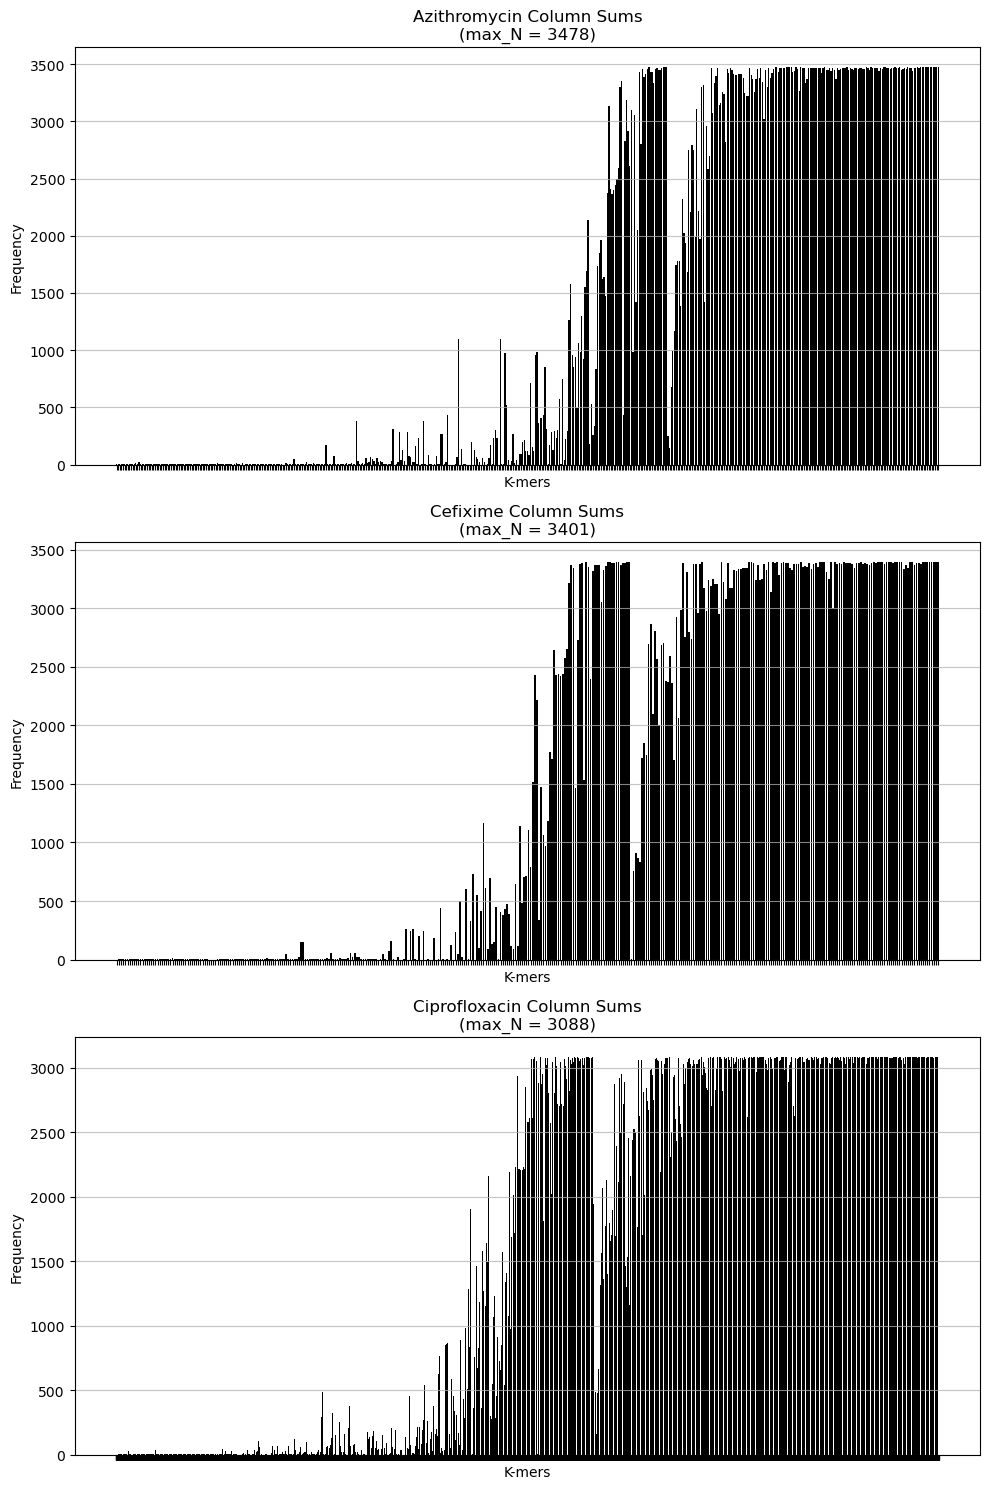

In [19]:
# Plotting histograms
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].bar(azithromycin_data.iloc[:,1:-1].columns , azithromycin_column_sums, color = 'black')
axs[0].set_title(f'Azithromycin Column Sums\n(max_N = {len(azithromycin_data)})')
axs[0].set_xlabel('K-mers')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', alpha=0.75)
axs[0].tick_params(axis='x', labelbottom=False)

axs[1].bar(cefixime_data.iloc[:,1:-1].columns , cefixime_column_sums, color = 'black')
axs[1].set_title(f'Cefixime Column Sums\n(max_N = {len(cefixime_data)})')
axs[1].set_xlabel('K-mers')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y', alpha=0.75)
axs[1].tick_params(axis='x', labelbottom=False)

axs[2].bar(ciprofloxacin_data.iloc[:,1:-1].columns , ciprofloxacin_column_sums, color = 'black')
axs[2].set_title(f'Ciprofloxacin Column Sums\n(max_N = {len(ciprofloxacin_data)})')
axs[2].set_xlabel('K-mers')
axs[2].set_ylabel('Frequency')
axs[2].grid(axis='y', alpha=0.75)
axs[2].tick_params(axis='x', labelbottom=False)

plt.tight_layout()
plt.show()

There are k-mers that appear in almost all samples, and there are kmers that appear in almost none of them. We will use this finding for the feature selection part.

## Checking class balance

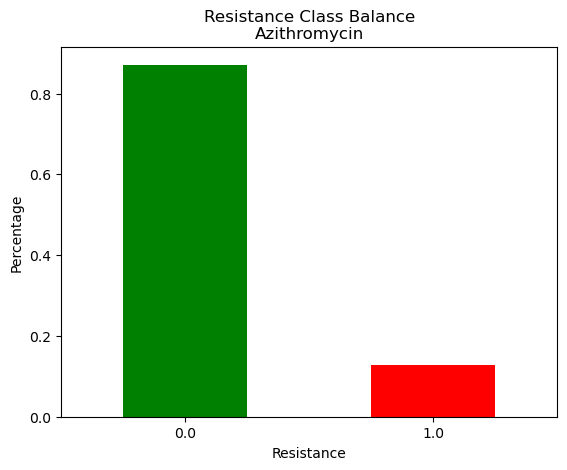

In [20]:
# Azithromycin
azithromycin_data.iloc[:, -1].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Resistance Class Balance\nAzithromycin')
plt.xlabel('Resistance')
plt.tick_params(axis='x', labelrotation = 0)
plt.ylabel('Percentage')
plt.show()

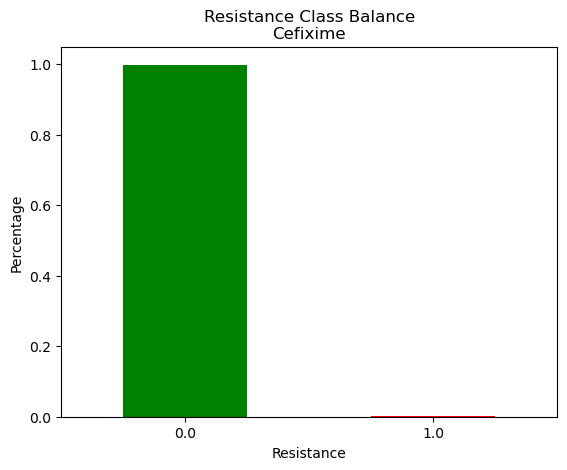

In [21]:
# Cefixime
cefixime_data.iloc[:, -1].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Resistance Class Balance\nCefixime')
plt.xlabel('Resistance')
plt.tick_params(axis='x', labelrotation = 0)
plt.ylabel('Percentage')
plt.show()

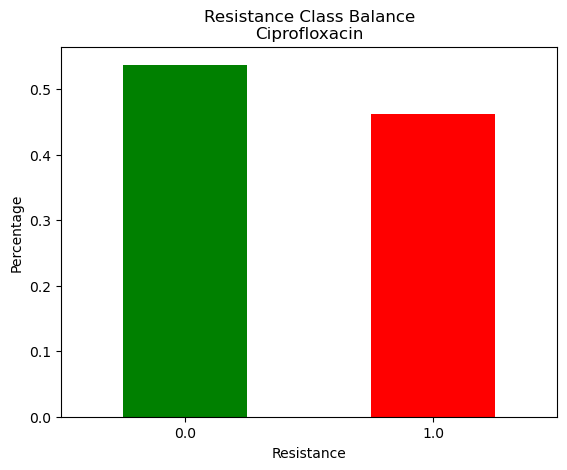

In [22]:
# Ciprofloxacin
ciprofloxacin_data.iloc[:, -1].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Resistance Class Balance\nCiprofloxacin')
plt.xlabel('Resistance')
plt.tick_params(axis='x', labelrotation = 0)
plt.ylabel('Percentage')
plt.show()

We can observe, that the data for Azithromycin and Cefixime is very imbalanced. We will need to take this into consideration for model training and selection. 

We believe that since **Cefixime** has only one positive sample, it is not possible to construct a classifier that predicts the resistance in a sensible way. Even a method like SMOTE-n would not work since that sample does not have other neighbours from the same class and thus we have decided to **remove** this antibiotic drug from our further modelling process. For Azithromycin we will use SMOTE-n (a specific type of SMOTE that is intended for categorical data) to balance the classes.

# 2) Feature selection

First we split the data into the feature matrix and target vector.

In [23]:
X_azithromycin = azithromycin_data.iloc[:, :-1] 
y_azithromycin = azithromycin_data.iloc[:, -1]

#X_cefixime = cefixime_data.iloc[:, :-1]
#y_cefixime = cefixime_data.iloc[:, -1]

X_ciprofloxacin = ciprofloxacin_data.iloc[:, :-1]
y_ciprofloxacin = ciprofloxacin_data.iloc[:, -1]

We only keep the k-mers that are not present or absent in almost all samples.

In [24]:
# Function that deletes columns corresponding to k-mers that appear in more than l% or less than u% of the samples
def delete_columns(df, u, l):
    cols_to_remove = []
    for col in df.columns[1:]:
        col_sum = df[col].sum()
        if (col_sum > (len(df) * u)) | (col_sum < (len(df) * l)): 
            cols_to_remove.append(col)
    df_selected = df.drop(columns=cols_to_remove)
    return df_selected

In [25]:
X_azithromycin_selected = delete_columns(X_azithromycin, 0.95, 0.05)
#X_cefixime_selected = delete_columns(X_cefixime, 0.95, 0.05)
X_ciprofloxacin_selected = delete_columns(X_ciprofloxacin, 0.8, 0.2)

# 3) Modelling

First we split the data intro train and test sets.

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train_azithromycin, X_test_azithromycin, y_train_azithromycin, y_test_azithromycin = train_test_split(X_azithromycin_selected.iloc[:, 1:], y_azithromycin, test_size=0.3, random_state=42)
#X_train_cefixime, X_test_cefixime, y_train_cefixime, y_test_cefixime = train_test_split(X_cefixime_selected.iloc[:, 1:], y_cefixime, test_size=0.3, random_state=42)
X_train_ciprofloxacin, X_test_ciprofloxacin, y_train_ciprofloxacin, y_test_ciprofloxacin = train_test_split(X_ciprofloxacin_selected.iloc[:, 1:], y_ciprofloxacin, test_size=0.3, random_state=42)

Use SMOTE-n for Azythromycin

In [27]:
#!pip install imblearn

In [28]:
from imblearn.over_sampling import SMOTEN

sampler = SMOTEN(random_state=12)
X_train_azithromycin_smote, y_train_azithromycin_smote= sampler.fit_resample(X_train_azithromycin, y_train_azithromycin)

print(f"Imbalanced training data where the minority class took up only {round(sum(y_train_azithromycin)/len(y_train_azithromycin),3) * 100}% of samples is now completely balanced.")

print(f"The previous minority class now takes up {(sum(y_train_azithromycin_smote)/len(y_train_azithromycin_smote)) * 100}% of the samples.")

Imbalanced training data where the minority class took up only 12.9% of samples is now completely balanced.
The previous minority class now takes up 50.0% of the samples.


# Search for the best model using gridsearch

#### The function we use for finding the best model

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

def find_best_model(models, param_grids, X_train, y_train):
    best_model_for_current = None
    best_score = 0.0

    for model, param_grid in zip(models, param_grids):
        grid_search = GridSearchCV(model, param_grid, scoring='balanced_accuracy', cv=5)
        grid_search.fit(X_train, y_train)
        
        current_best_model = grid_search.best_estimator_
        current_score = grid_search.best_score_

        print(f"Best Score for {model.__class__.__name__}: {current_score}")

        # Update the best model if the current model has a higher score
        if current_score > best_score:
            best_score = current_score
            best_model_for_current = current_best_model

    print(f"\nBest Model: {best_model_for_current.__class__.__name__}\n")
    return best_model_for_current

#### Find the best model

In [30]:
models = [
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

param_grids = [
    {'n_estimators': [10,50], 'max_depth': [10,20]},
    {'C': [1,10,20,30,50], 'kernel': ['linear', 'rbf']},
    {'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance']}
]


print("--- Best model for Azithromycin ---")
best_model_azithromycin = find_best_model(models, param_grids, X_train_azithromycin, y_train_azithromycin)

print("--- Best model for Azithromycin with SMOTE-n ---")
best_model_azithromycin_smote = find_best_model(models, param_grids, X_train_azithromycin_smote, y_train_azithromycin_smote)

print("--- Best model for Ciprofloxacin ---")
best_model_ciprofloxacin = find_best_model(models, param_grids, X_train_ciprofloxacin, y_train_ciprofloxacin)

--- Best model for Azithromycin ---
Best Score for RandomForestClassifier: 0.9141526312289979
Best Score for SVC: 0.9498976624936848
Best Score for KNeighborsClassifier: 0.8420644811789597

Best Model: SVC

--- Best model for Azithromycin with SMOTE-n ---
Best Score for RandomForestClassifier: 0.9766542730299668
Best Score for SVC: 0.9778335183129855
Best Score for KNeighborsClassifier: 0.9646281908990011

Best Model: SVC

--- Best model for Ciprofloxacin ---
Best Score for RandomForestClassifier: 0.9609649512276711
Best Score for SVC: 0.9633857583403656
Best Score for KNeighborsClassifier: 0.952162860023835

Best Model: SVC



### Predictions

#### Azithromycin

In [31]:
best_model_azithromycin.fit(X_train_azithromycin, y_train_azithromycin)

y_pred_train_azithromycin = best_model_azithromycin.predict(X_train_azithromycin)
y_pred_test_azithromycin = best_model_azithromycin.predict(X_test_azithromycin)

#### Azithromycin with SMOTE-n

In [32]:
best_model_azithromycin_smote.fit(X_train_azithromycin_smote, y_train_azithromycin_smote)

y_pred_train_azithromycin_smote = best_model_azithromycin_smote.predict(X_train_azithromycin_smote)
y_pred_test_azithromycin_smote = best_model_azithromycin_smote.predict(X_test_azithromycin)

#### Ciprofloxacin

In [33]:
best_model_ciprofloxacin.fit(X_train_ciprofloxacin, y_train_ciprofloxacin)

y_pred_train_ciprofloxacin = best_model_ciprofloxacin.predict(X_train_ciprofloxacin)
y_pred_test_ciprofloxacin = best_model_ciprofloxacin.predict(X_test_ciprofloxacin)

# 4) Performance evaluation

#### Azithromycin

In [34]:
from sklearn.metrics import balanced_accuracy_score as bacc

accuracy_train_azithromycin = bacc(y_pred_train_azithromycin, y_train_azithromycin)
accuracy_test_azithromycin = bacc(y_pred_test_azithromycin, y_test_azithromycin)

print(f"Balanced accuracy on training set: {accuracy_train_azithromycin} ")
print(f"Balanced accuracy on test set: {accuracy_test_azithromycin} ")

Balanced accuracy on training set: 0.9334408182575722 
Balanced accuracy on test set: 0.9197286395306197 


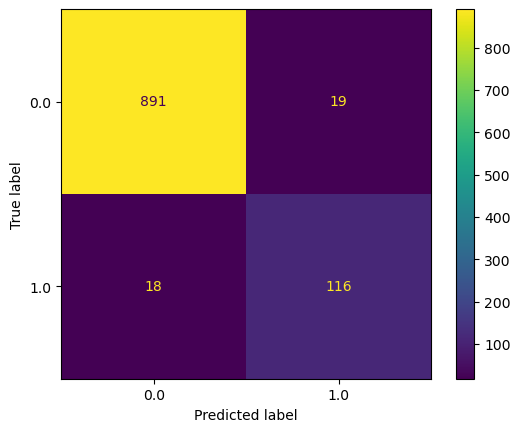

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model_azithromycin, X_test_azithromycin, y_test_azithromycin)

#### Azithromycin with SMOTE-n

In [36]:
accuracy_train_azithromycin_smote = bacc(y_pred_train_azithromycin_smote, y_train_azithromycin_smote)
accuracy_test_azithromycin_smote = bacc(y_pred_test_azithromycin_smote, y_test_azithromycin)

print(f"Balanced accuracy on training set: {accuracy_train_azithromycin_smote} ")
print(f"Balanced accuracy on test set: {accuracy_test_azithromycin_smote} ")

Balanced accuracy on training set: 0.9917737710340706 
Balanced accuracy on test set: 0.9229457110054125 


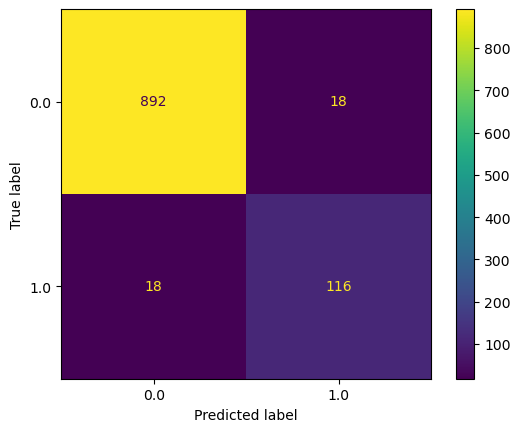

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model_azithromycin_smote, X_test_azithromycin, y_test_azithromycin)

#### Ciprofloxacin

In [38]:
accuracy_train_ciprofloxacin = bacc(y_pred_train_ciprofloxacin, y_train_ciprofloxacin)
accuracy_test_ciprofloxacin = bacc(y_pred_test_ciprofloxacin, y_test_ciprofloxacin)

print(f"Balanced accuracy on training set: {accuracy_train_ciprofloxacin} ")
print(f"Balanced accuracy on test set: {accuracy_test_ciprofloxacin} ")

Balanced accuracy on training set: 0.9972109507289473 
Balanced accuracy on test set: 0.9699213457775102 


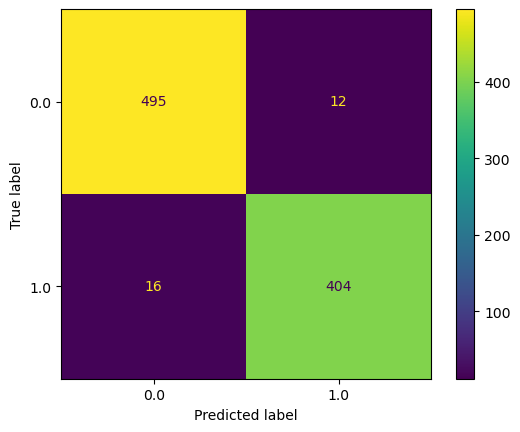

In [39]:
ConfusionMatrixDisplay.from_estimator(best_model_ciprofloxacin, X_test_ciprofloxacin, y_test_ciprofloxacin)